<a href="https://colab.research.google.com/github/Suryabhan23/Assigment--1/blob/main/SuryabhanAR16_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
Actual_table= pd.read_csv("https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/AutoElite_Actual.csv")
Budget_table = pd.read_csv("https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/AutoElite_Budget.csv")
print(Actual_table.head())
print(Budget_table.head())

   SN  Transaction Details       Date    Month       State Region      Model  \
0   1  ORD0014010123TNSHBK   1/1/2023  January  Tamil Nadu  South  Hatchback   
1   2  ORD0045010323TNSHBK   1/3/2023  January  Tamil Nadu  South  Hatchback   
2   3  ORD0046012723TNSHBK  1/27/2023  January  Tamil Nadu  South  Hatchback   
3   4  ORD0047010423TNSHBK   1/4/2023  January  Tamil Nadu  South  Hatchback   
4   5  ORD0015010323TNSSUV   1/3/2023  January  Tamil Nadu  South        SUV   

   Quantity Sold  
0              1  
1              3  
2              4  
3              1  
4              3  
     Month Region       State      Model  Budgeted Quantity
0  January  South  Tamil Nadu  Hatchback                 12
1  January  South  Tamil Nadu        SUV                  8
2  January  South  Tamil Nadu      Sedan                  6
3  January  South   Karnataka  Hatchback                 11
4  January  South   Karnataka        SUV                  7


In [7]:
Actual_table.columns= Actual_table.columns.str.lower().str.replace(" ","_")
Actual_table.columns

Index(['sn', 'transaction_details', 'date', 'month', 'state', 'region',
       'model', 'quantity_sold'],
      dtype='object')

In [8]:
Budget_table.columns=Budget_table.columns.str.lower().str.replace(" ","_")
Budget_table.columns

Index(['month', 'region', 'state', 'model', 'budgeted_quantity'], dtype='object')

In [9]:
Actual_quantity= Actual_table.groupby(['month','region','state','model'])['quantity_sold'].sum().reset_index()
Actual_quantity.head()

,month,region,state,model,quantity_sold
0,April,East,West Bengal,Hatchback,10
1,April,East,West Bengal,SUV,8
2,April,East,West Bengal,Sedan,5
3,April,North,Haryana,Hatchback,9
4,April,North,Haryana,SUV,16


In [11]:
Merged_table= pd.merge(Budget_table,Actual_quantity,on=['month', 'region', 'state', 'model'],how='left')
Merged_table.head()

,month,region,state,model,budgeted_quantity,quantity_sold
0,January,South,Tamil Nadu,Hatchback,12,9
1,January,South,Tamil Nadu,SUV,8,8
2,January,South,Tamil Nadu,Sedan,6,6
3,January,South,Karnataka,Hatchback,11,8
4,January,South,Karnataka,SUV,7,9


In [12]:
Merged_table['Variance']= Merged_table['quantity_sold']-Merged_table['budgeted_quantity']
Merged_table.head()

,month,region,state,model,budgeted_quantity,quantity_sold,Variance
0,January,South,Tamil Nadu,Hatchback,12,9,-3
1,January,South,Tamil Nadu,SUV,8,8,0
2,January,South,Tamil Nadu,Sedan,6,6,0
3,January,South,Karnataka,Hatchback,11,8,-3
4,January,South,Karnataka,SUV,7,9,2


In [15]:
month_mapping={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,
               'September':9,"Octomber":10,'November':11,'December':12}
Merged_table['month_number']= Merged_table['month'].map(month_mapping)
Merged_table

,month,region,state,model,budgeted_quantity,quantity_sold,Variance,month_number
0,January,South,Tamil Nadu,Hatchback,12,9,-3,1.0
1,January,South,Tamil Nadu,SUV,8,8,0,1.0
2,January,South,Tamil Nadu,Sedan,6,6,0,1.0
3,January,South,Karnataka,Hatchback,11,8,-3,1.0
4,January,South,Karnataka,SUV,7,9,2,1.0
...,...,...,...,...,...,...,...,...
355,December,North,Uttar Pradesh,SUV,9,8,-1,12.0
356,December,North,Uttar Pradesh,Sedan,8,10,2,12.0
357,December,East,West Bengal,Hatchback,10,9,-1,12.0
358,December,East,West Bengal,SUV,9,13,4,12.0


In [16]:
Month_variance= Merged_table.groupby(['month','month_number'])['Variance'].sum().reset_index()
sorted_month_variance= Month_variance.sort_values('month_number',ascending=True)
sorted_month_variance

,month,month_number,Variance
4,January,1.0,2
3,February,2.0,12
7,March,3.0,-19
0,April,4.0,-10
8,May,5.0,-91
6,June,6.0,-105
5,July,7.0,-86
1,August,8.0,-57
10,September,9.0,82
9,November,11.0,105


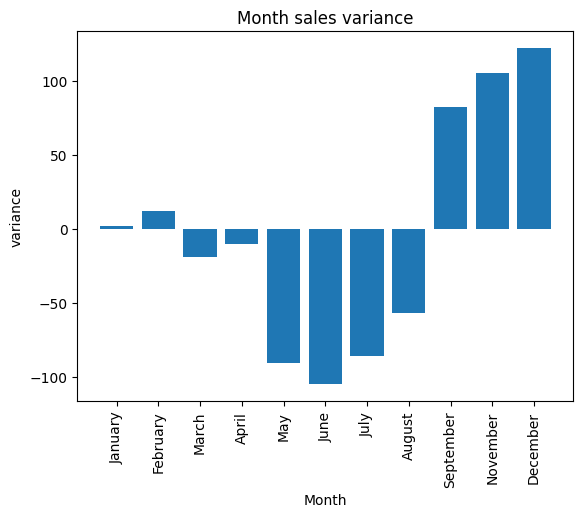

In [17]:
plt.bar(x=sorted_month_variance['month'],height=sorted_month_variance['Variance'])
plt.xlabel("Month")
plt.ylabel("variance")
plt.title("Month sales variance")
plt.xticks(ticks=sorted_month_variance['month'],rotation=90)
plt.show()

In [19]:
region_variance=Merged_table.groupby(['region'])['Variance'].sum().reset_index()
region_variance

,region,Variance
0,East,-70
1,North,71
2,South,118
3,West,-34


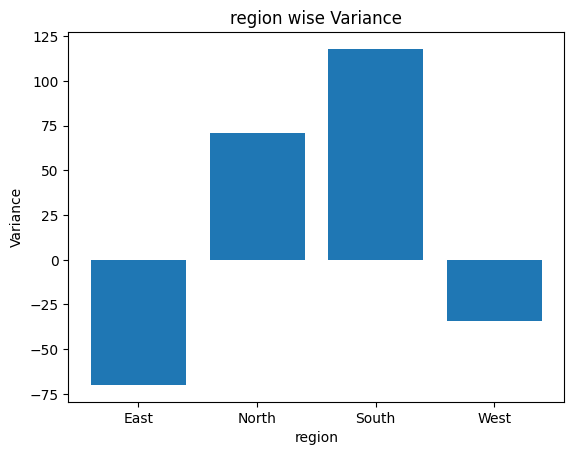

In [20]:
plt.bar(x=region_variance['region'],height=region_variance['Variance'])
plt.xlabel('region')
plt.ylabel('Variance')
plt.title("region wise Variance")
plt.show()

In [22]:
State_variance=Merged_table.groupby(['state'])['Variance'].sum().reset_index()
State_variance

,state,Variance
0,Andhra Pradesh,54
1,Gujarat,-21
2,Haryana,3
3,Karnataka,55
4,Maharashtra,-29
5,Punjab,50
6,Rajasthan,-13
7,Tamil Nadu,38
8,Uttar Pradesh,18
9,West Bengal,-70


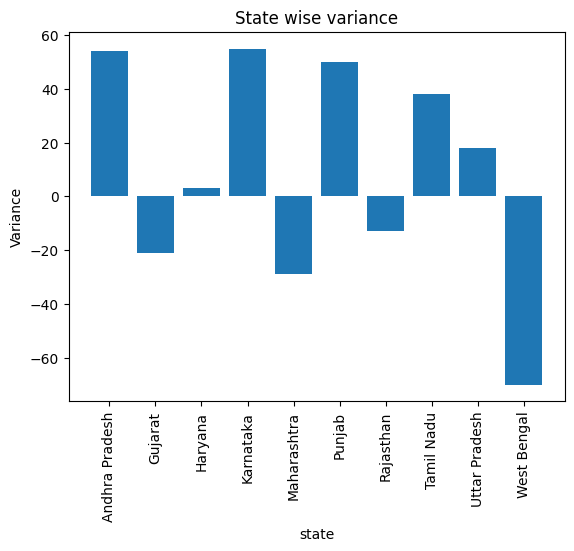

In [26]:
plt.bar(x=State_variance['state'],height=State_variance['Variance'])
plt.xlabel("state")
plt.ylabel("Variance")
plt.title("State wise variance")
plt.xticks(ticks=State_variance['state'],rotation=90)
plt.show()